# Question 2
Delivery_time -> Predict delivery time using sorting time

# <span style="color:blue">EDA</span>

In [1]:
# Step 1: importing neccessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# load data
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# checking descriptive stats 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# checking for null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
# Step 2: check for duplicated record
data.duplicated().sum()

0

<AxesSubplot:>

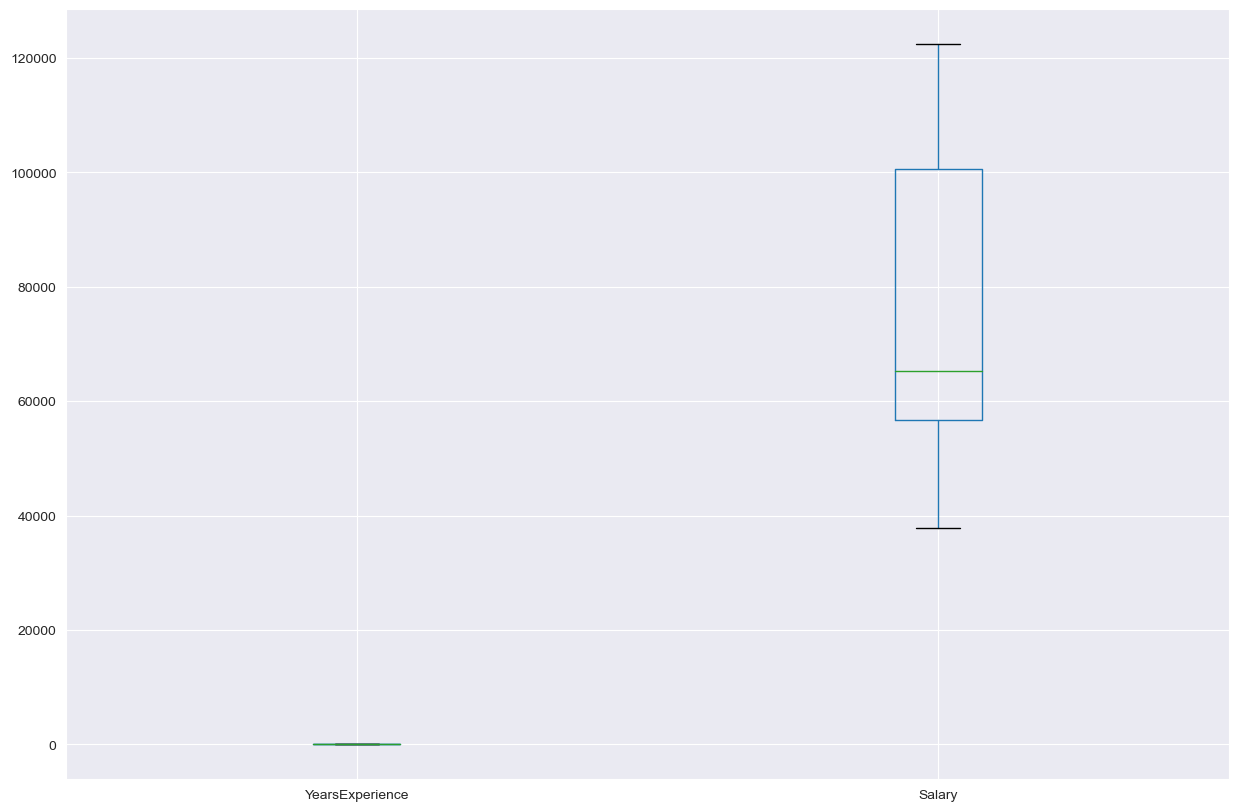

In [7]:
# step 3: check for outliers 
data.boxplot()

<span style="color:red">There is no outliers present</span>

In [8]:
# step 4 checking for correlation 
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

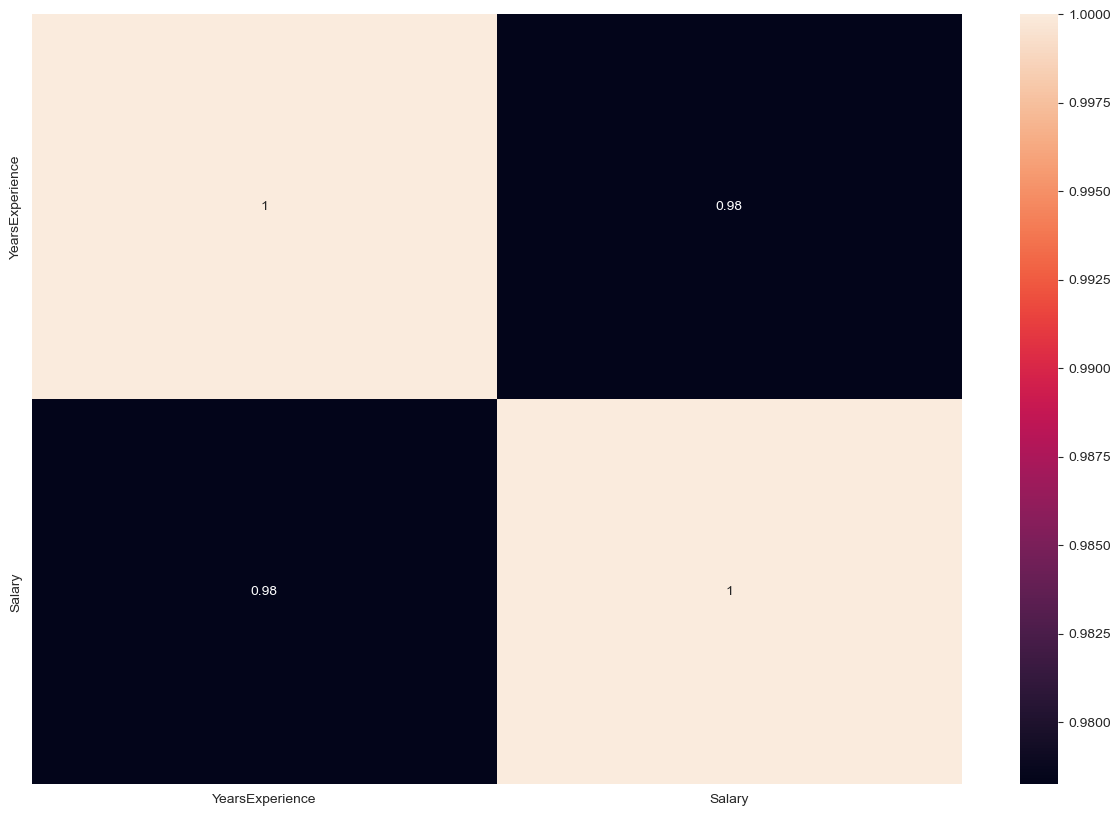

In [9]:
sns.heatmap(data.corr(),annot=True)

<span style="color:blue">There is good correlation between the two variable.</span>

<span style="color:blue">The score is more than 0.8 which is a good sign.</span>

# model building

Text(0.5, 1.0, 'Salary')

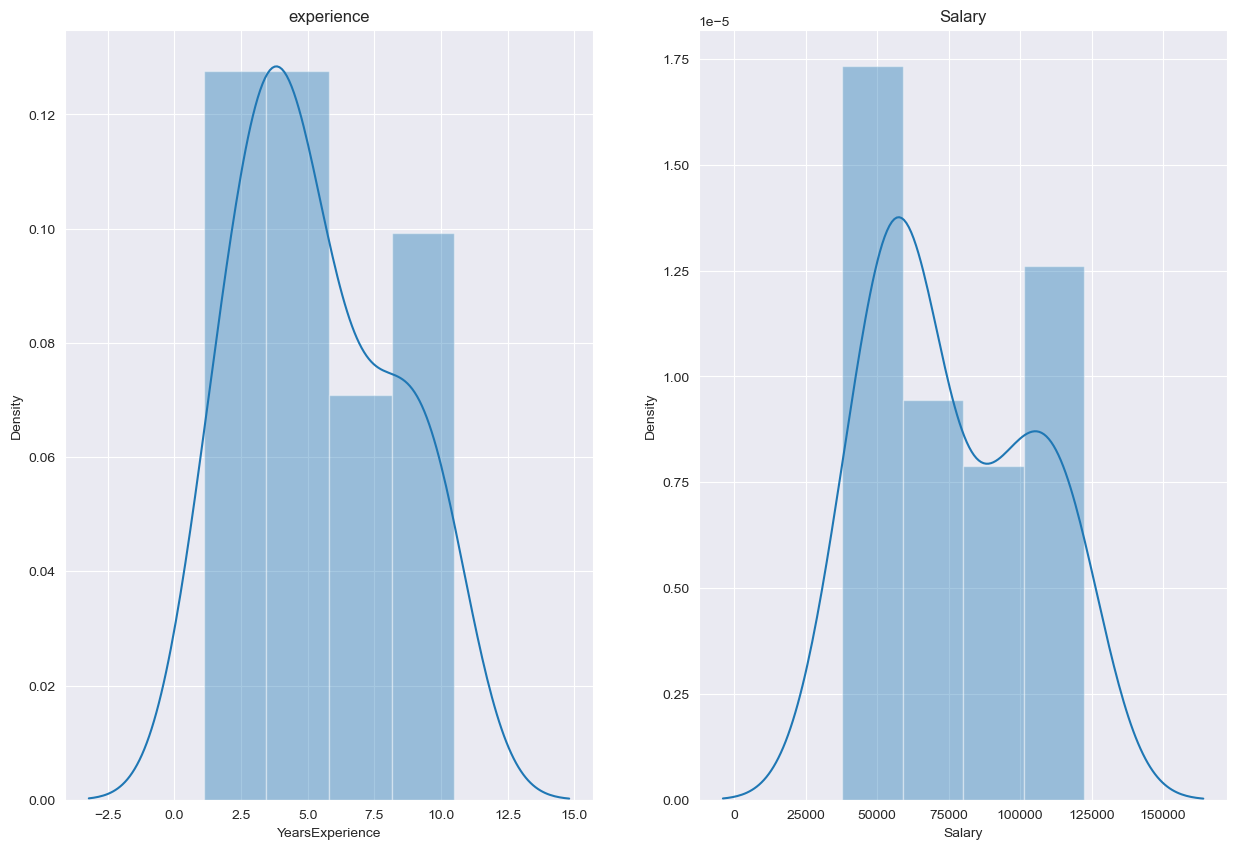

In [10]:
# check for skewness 
plt.subplot(1,2,1)
sns.distplot(data["YearsExperience"])
plt.title('experience')

plt.subplot(1,2,2)
sns.distplot(data["Salary"])
plt.title('Salary')

In [11]:
data['YearsExperience'].skew()

0.37956024064804106

<span style="color:blue">log transformation for reducing skewnes</span>

In [12]:
data['log_YE'] = np.log(data['YearsExperience'])
data.head()

,YearsExperience,Salary,log_YE
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


Text(0.5, 1.0, 'Log Distribution')

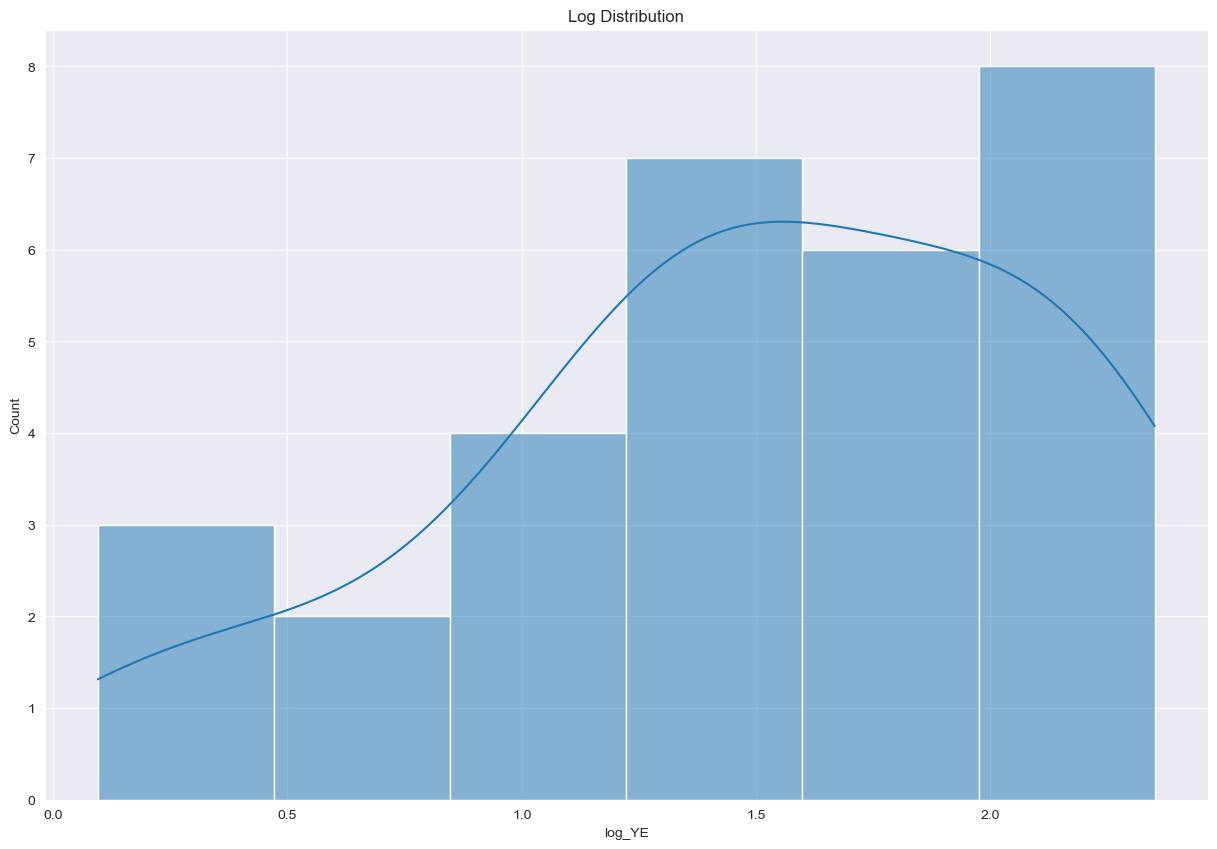

In [13]:
sns.histplot(data=data['log_YE'],kde=True)
plt.title('Log Distribution')

In [14]:
data['log_YE'].skew()

-0.6005648582626513

<span style="color:blue">square root transformation ,another way to deal with skewness</span>

In [17]:
data['sqrt_YE'] = np.sqrt(data['YearsExperience'])
data.head()

,YearsExperience,Salary,log_YE,sqrt_YE
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


Text(0.5, 1.0, 'sqrt Distribution')

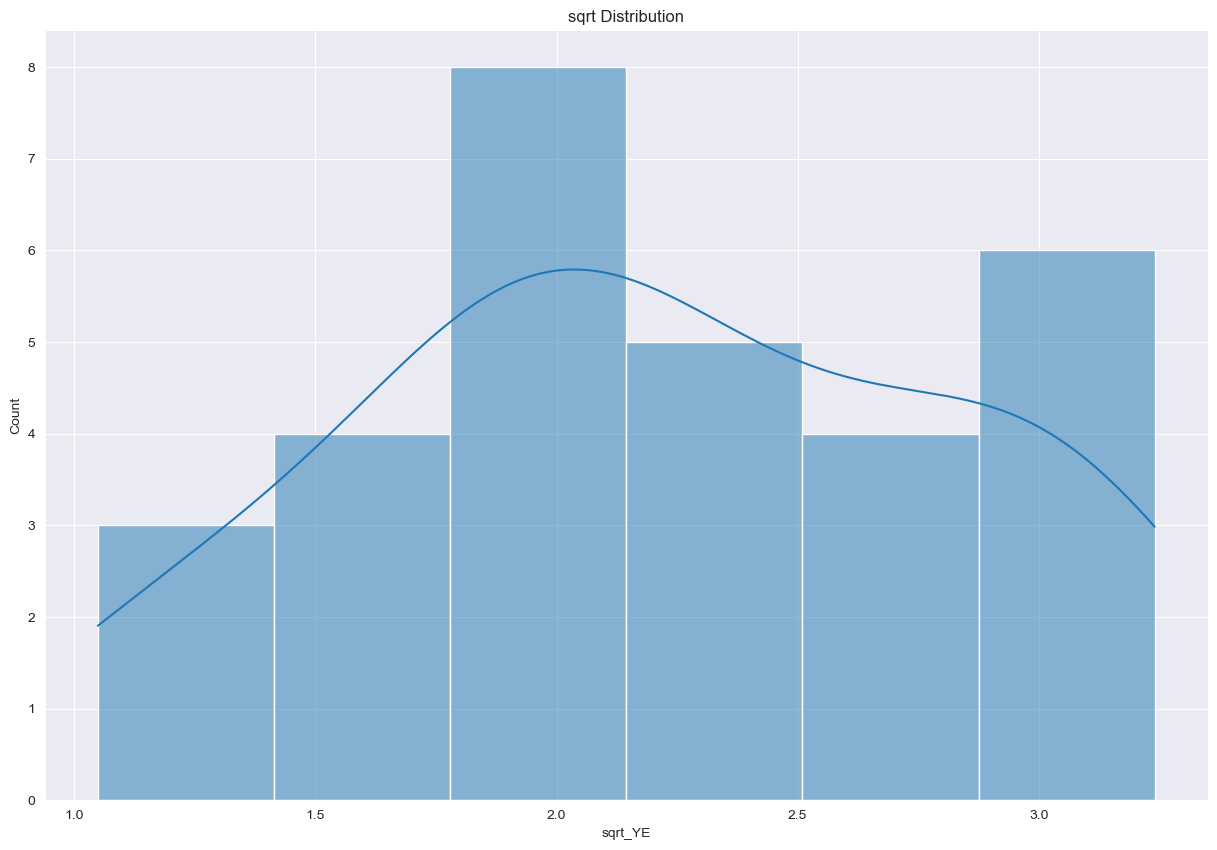

In [18]:
sns.histplot(data=data['sqrt_YE'],kde=True)
plt.title('sqrt Distribution')

In [19]:
data['sqrt_YE'].skew()

-0.04919608394250605

<span style="color:blue">*We will now fit linear regression model</span>

<span style="color:blue">*We will create 3 models and check for best model</span>

In [47]:
# importing statsmodel for linearregression model
import statsmodels.formula.api as smf

In [22]:
data.head()

,YearsExperience,Salary,log_YE,sqrt_YE
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


In [24]:
# model 1 on original data
model_1 = smf.ols('Salary ~ YearsExperience',data=data).fit()

In [25]:
model_1.rsquared

0.9569566641435086

In [26]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
# model 2 on log transformation
model_2 = smf.ols('Salary ~ log_YE',data=data).fit()

In [30]:
model_2.rsquared

0.8538888828756969

In [31]:
model_2.params

Intercept    14927.97177
log_YE       40581.98796
dtype: float64

In [32]:
# model 3 on square-root transformation
model_3 = smf.ols('Salary ~ sqrt_YE',data=data).fit()

In [33]:
model_3.rsquared

0.9310009544993526

In [34]:
model_3.params

Intercept   -16055.769117
sqrt_YE      41500.680583
dtype: float64

# <span style="color:blue">ploting best fit line for 3 models</span>

In [45]:
def plot_line(params,target,feature,title='Fit line'):
    y = [((params[1]*x) + params[0]) for x in feature]
    plt.scatter(feature,target)
    plt.plot(feature,y,color='red',label='Model fit line')
    plt.title(title)
    plt.legend()
    plt.show()

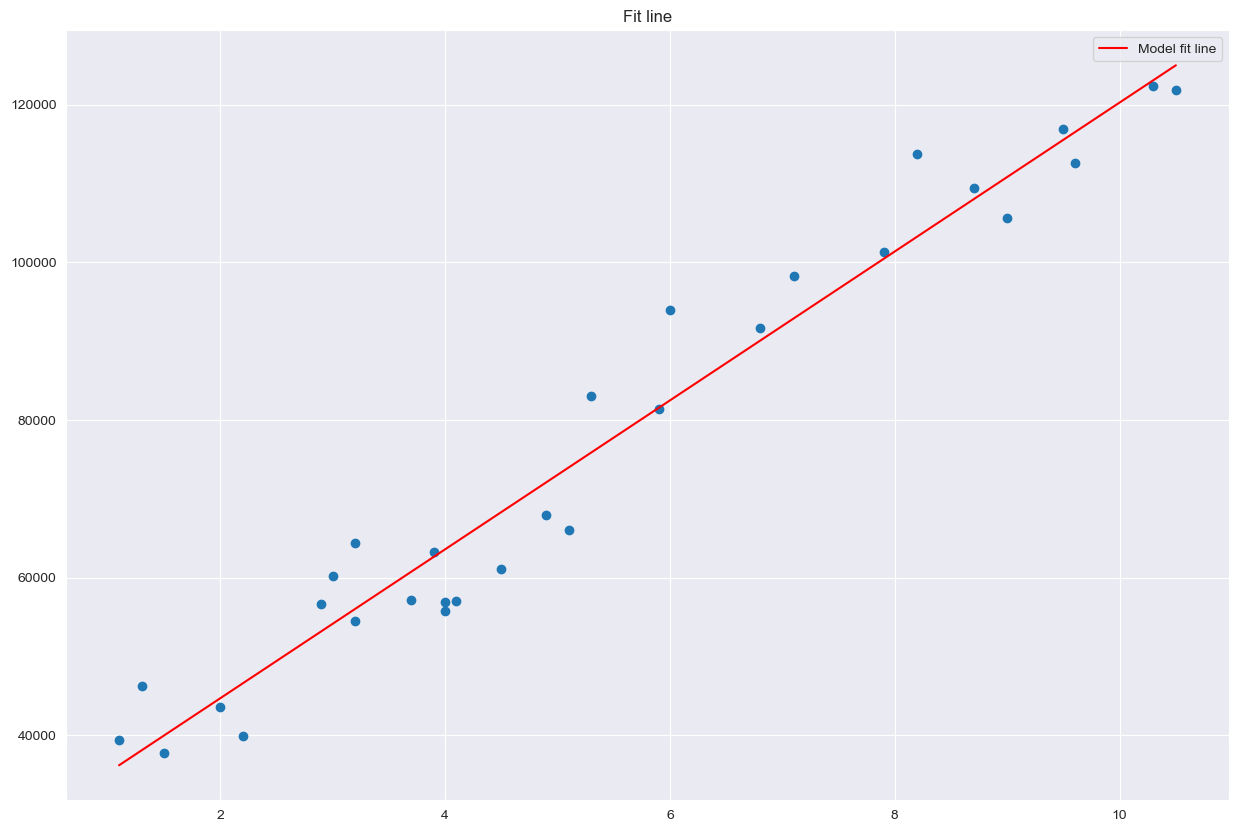

In [46]:
# plot for model 1
plot_line(model_1.params,data['Salary'],data['YearsExperience'])

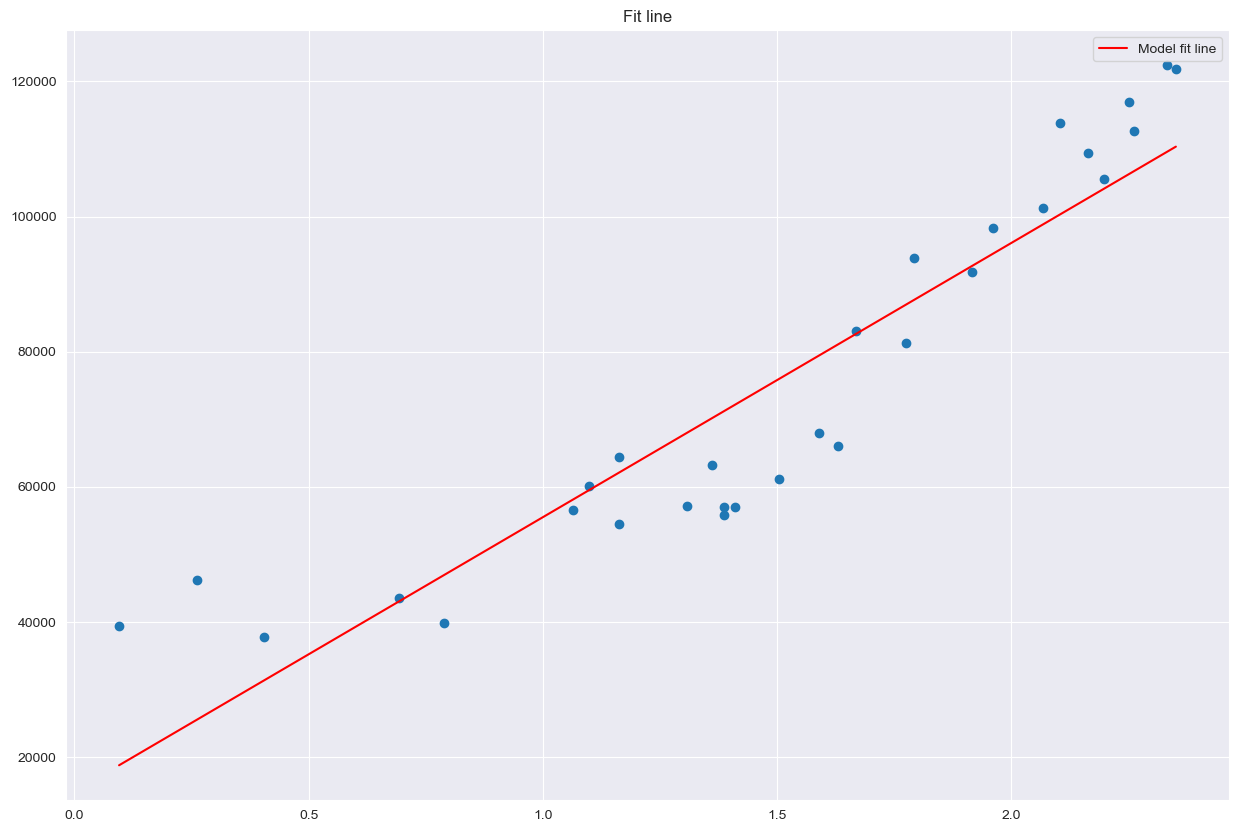

In [38]:
# plot for model 2
plot_line(model_2.params,data['Salary'],data['log_YE'])

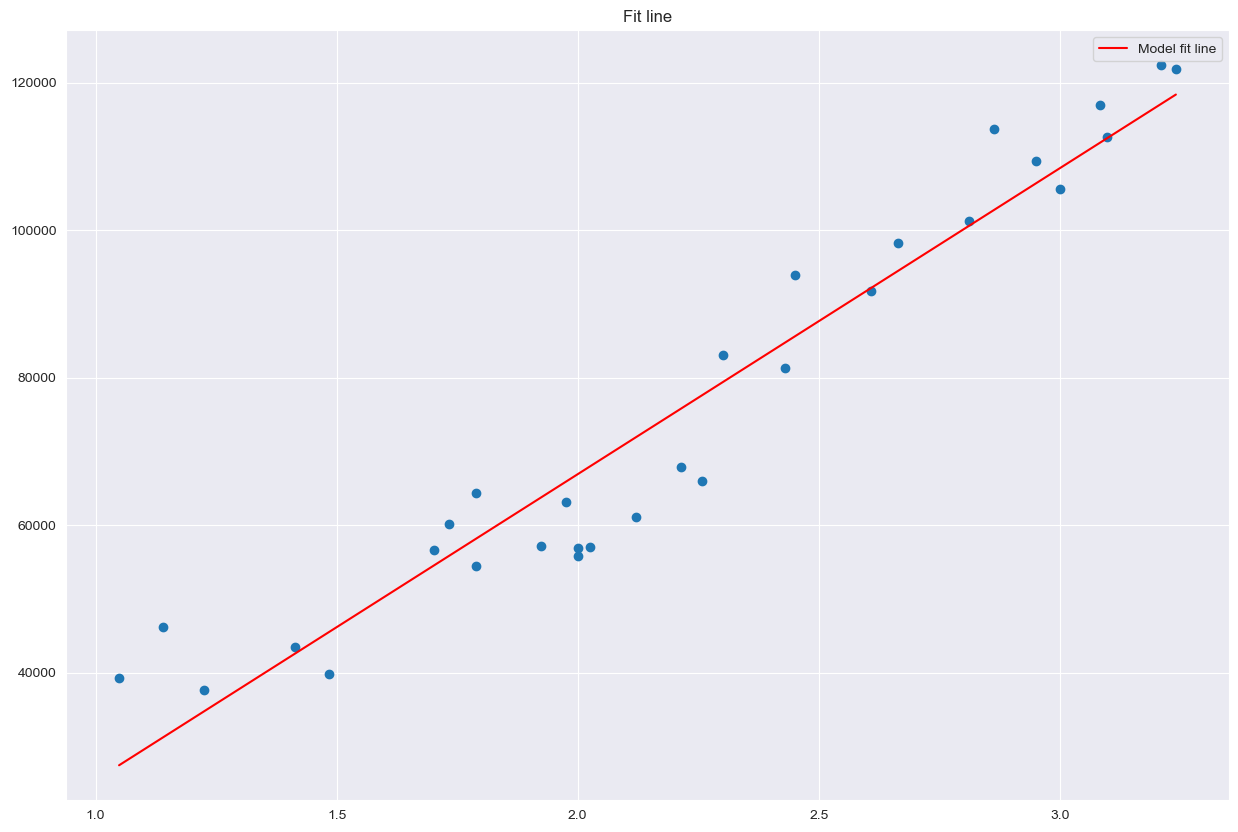

In [39]:
# plot for model 3
plot_line(model_3.params,data['Salary'],data['sqrt_YE'])

In [40]:
models = [(model_1,'model_1'),(model_2,'model_2'),(model_3,'model_3')]

In [41]:
mdl_scr = {
    'Model':[x[1] for x in models],
    'Score':[x[0].rsquared for x in models]
}
scr = pd.DataFrame(mdl_scr)
scr

,Model,Score
0,model_1,0.956957
1,model_2,0.853889
2,model_3,0.931001


In [42]:
scr[scr['Score']==scr['Score'].max()]

,Model,Score
0,model_1,0.956957


<span style="color:red">The simple linear regressor performs best with original data</span>